## Importing modules


In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 27 22:49:33 2018

@author: yassine
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from numba import jit

%matplotlib qt4


## Question 1.b and 1.c

Variance of W_T:
0.999043213972

Covariance matrix of (W_T, W_{T/2}):
[[ 1.00004326  0.51221574]
 [ 0.51221574  0.52473423]]


<IPython.core.display.Javascript object>


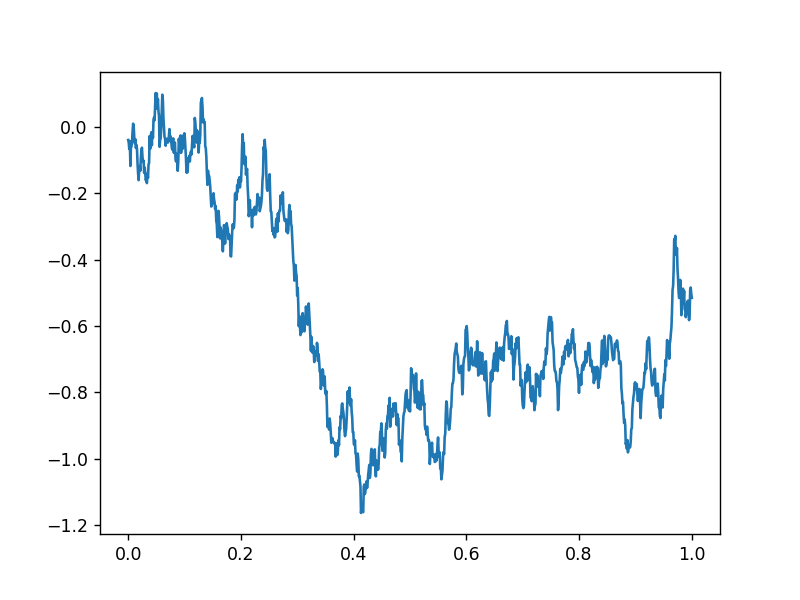

In [8]:
T = 1

def Forward_Generator(T,n,N):
    
    """
        N : number of trajectory copies 
    """
    
    Delta_T = T/(2**n)
    Z = np.random.normal(0,1,size=(2**n+1,N))
    
    return np.cumsum(np.sqrt(Delta_T)*Z,axis=0)




N = 1000
n = 10

W = Forward_Generator(T,n,N)

W_T = W[-1,:]
W_halfT = W[2**(n-1),:]


WT_variance = np.var(W_T)
Cov_matrix = np.cov(W_T,W_halfT )



print("Variance of W_T:")
print(WT_variance)

print("")

print("Covariance matrix of (W_T, W_{T/2}):")
print(Cov_matrix)

plt.figure(1)
plt.plot(np.linspace(0,1,2**n+1),W[:,0])

## Questions 2.c and 2.d

In [3]:


@jit
def Backward_Generator(T,n,N):
    
    W = np.zeros((2**n +1, N))
    W[-1,:]= np.random.normal(0,np.sqrt(T),N)


    k = 2


    for i in range(1,n+1):

        for k in range(2**(i-1)):

            upper_index = (k+1)*(2**(n-i+1))
            lower_index =   k  *(2**(n-i+1))


            W[(2*k+1)*2**(n-i),:] = np.random.normal( ( W[lower_index,:] + W[upper_index,:] )/2 , np.sqrt(T/2**(i+1)) )

        
    return W
    


Quadratic variation:  0.914044659958
Variance of W_T:
1.00466731245

Covariance matrix of (W_T, W_{T/2}):
[[ 1.00567299  0.53085576]
 [ 0.53085576  0.54813268]]


<IPython.core.display.Javascript object>


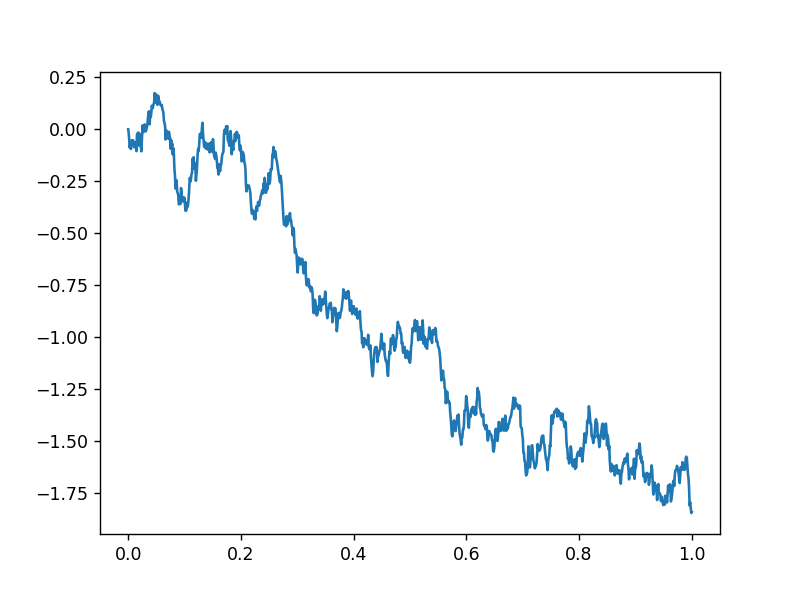

In [9]:
N = 1000
T = 1
n = 10


W= Backward_Generator(T,n,N)

W_T = W[-1,:]
W_halfT = W[2**(n-1),:]


WT_variance = np.var(W_T)
Cov_matrix = np.cov(W_T,W_halfT )

QV = np.sum((W[1:,0]- W[:2**n,0])**2)

print("Quadratic variation: ",QV)


print("Variance of W_T:")
print(WT_variance)

print("")

print("Covariance matrix of (W_T, W_{T/2}):")
print(Cov_matrix)

plt.figure(2)
plt.plot(np.linspace(0,1,2**n+1),W[:,0])

## Question 3

Generating estimation erros for n=  2
Generating estimation erros for n=  3
Generating estimation erros for n=  4
Generating estimation erros for n=  5
Generating estimation erros for n=  6
Generating estimation erros for n=  7
Generating estimation erros for n=  8
Generating estimation erros for n=  9
Generating estimation erros for n=  10
Generating estimation erros for n=  11
Generating estimation erros for n=  12
Generating estimation erros for n=  13
Generating estimation erros for n=  14
Generating estimation erros for n=  15
Generating estimation erros for n=  16
Generating estimation erros for n=  17
Generating estimation erros for n=  18
Generating estimation erros for n=  19


<IPython.core.display.Javascript object>


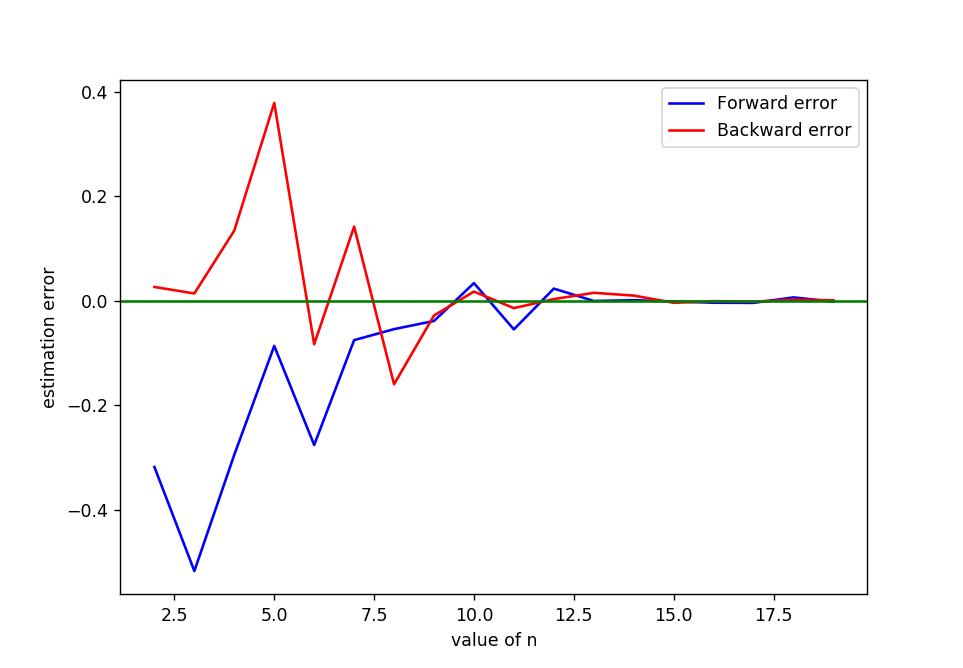

In [9]:
N = 1
T = 1


n_list = range(2,20)


Forward_list = []
Backward_list = []

for n in n_list:
    
    print("Generating estimation erros for n= ",n)
    
    forward_W = Forward_Generator(T,n,N)
    backward_W = Backward_Generator(T,n,N)
    
    
    QV_forward = np.sum((forward_W[1:,0] - forward_W[:2**n,0])**2)
    QV_backward = np.sum((backward_W[1:,0] - backward_W[:2**n,0])**2)

    Forward_list.append(QV_forward - T)
    Backward_list.append(QV_backward - T)


plt.figure(3)

plt.plot(n_list,Forward_list,label = "Forward error",color = 'b')
plt.plot(n_list,Backward_list,label = "Backward error",color = 'r')
plt.axhline(y=0,color='g')
plt.xlabel("value of n")
plt.ylabel("estimation error")

plt.legend()

18